# K-means Clustering

`k-means` is the most widely-used `centroid-based clustering` algorithm. 

## Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans

%matplotlib inline

## Read data

In [2]:
data = np.genfromtxt("./data/sample_dataset.csv", delimiter=',')

### Plot the data

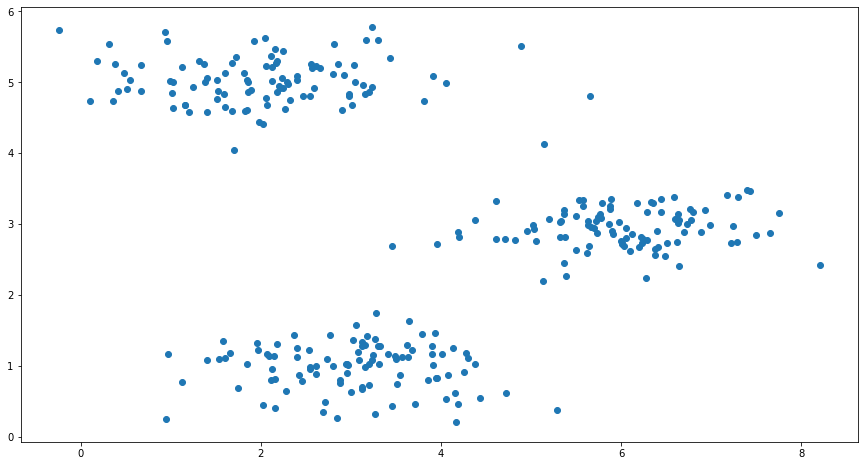

In [3]:
plt.figure(figsize=(15, 8))
plt.scatter(data[:, 0], data[:, 1])

## K-means

- [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

    - cluster_centers_ (array, [n_clusters, n_features]):
    Coordinates of cluster centers. If the algorithm stops before fully converging (see tol and max_iter), these will not be consistent with labels_.
    - labels_: 
    Labels of each point
    - inertia_ (float): 
    Sum of squared distances of samples to their closest cluster center.
    - n_iter_ (int): 
    Number of iterations run.

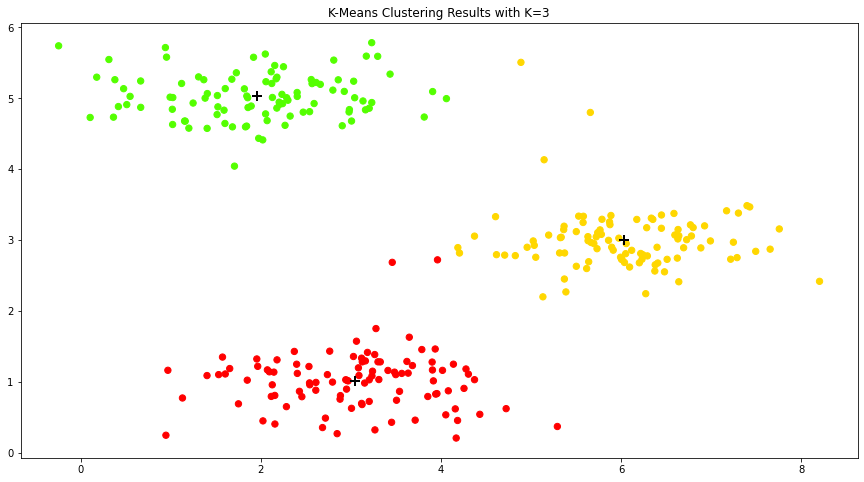

In [4]:
kmeans = KMeans(n_clusters=3).fit(data)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# plot
plt.figure(figsize=(15, 8))
plt.scatter(data[:, 0], data[:, 1], s=40, c=cluster_labels, cmap=plt.cm.prism)
plt.title('K-Means Clustering Results with K=3')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='+', c='k', s=100, linewidth=2)

## Optimal number of clusters

### Elbow Method

- WCSS (within-cluster sum of squares)

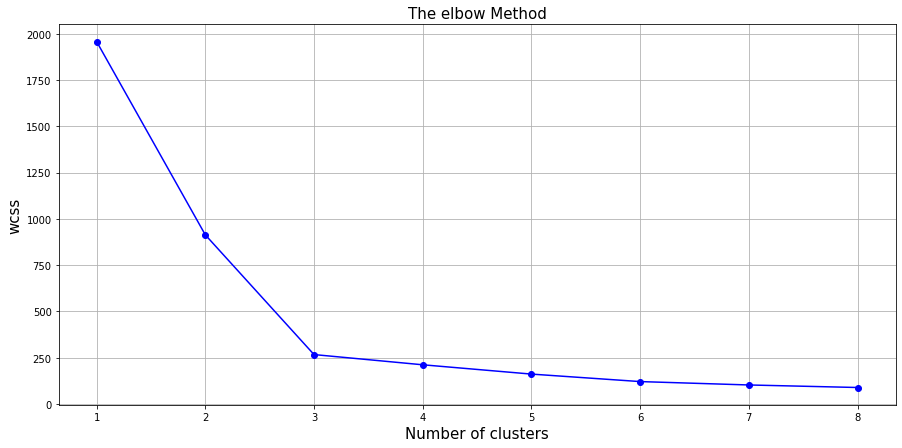

In [5]:
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10,random_state=10).fit(data)
    wcss.append(kmeans.inertia_)

plt.subplots(figsize=(15, 7))
plt.plot(range(1, 9), wcss, 'bo-')
plt.title('The elbow Method', fontsize=15)
plt.xlabel('Number of clusters', fontsize=15)
plt.ylabel('wcss', fontsize=15)
plt.grid()
plt.show()

# [Option] Implementing the K-means clustering algorithm

The K-means algorithm is a method to automatically cluster similar data examples together.

## Description
Given a set of observations $\{x_{1}, x_{2}, \cdots, x_{n}\}$, and want to group the data into $k(≤n)$ sets $S = \{S_{1}, S_{2}, \cdots, S_{k}\}$ so as to minimize the `within-cluster sum of squares (WCSS)`. Formally, the objective is to find:

$$ argmin \sum_{i=1}^{k} \sum_{x\in S_{i}} \lvert\rvert x - \mu_i \lvert\rvert^2 $$

where $\mu_{i}$ is the mean of points in $S_{i}$ (centroids of sets).

## Algorithm

### Standard algorithm (naive k-means)

The K-means algorithm is as follows:

    1. Initial centroids
    2. Assigning examples to the closest centroids
    3. Recomputing the centroids based on the assignments.
    4. Repeate step 2 and 3.

In [6]:
# Settings for running K-Means
K = 3
MaxIters = 10

# Here, we set centroids to specific values first
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

##  Finding closest centroids

In the “Assignment step”, the algorithm assigns every example $x_{i}$ to its closest centroid, given the current positions of centroids. 

Specifically, for every example $i$ we set

$$ c_{i} = argmin \sum_{j=1}^{k} \lvert\rvert x_{i} - \mu_j \lvert\rvert^2 $$

- $c_{i}$ is the index of the centroid that is closest to $x_{i}$
* Note that $c_{i}$ corresponds to idx[i] in the code.

In [7]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example.
    
    @Parameters
        X:         (n, m) -> n examples each of m dimensions.
        centroids: (K, m) -> K is the number of clusters.
    
    @Returns 
        idx: (n,) -> The centroids assignment for each example.
    """
    # Initialize values
    K = centroids.shape[0]
    n = X.shape[0]

    idx = np.zeros(n, dtype=int)
    distance = np.zeros(K)
    
    # Compute centroid
    for i in range(n):
        for k in range(K):
            distance[k] = np.sum(np.square(X[i, :] - centroids[k, :]), axis=0)
        idx[i] = np.argmin(distance)
        
    return idx

In [8]:
# Find the closest centroids for the examples using the initial_centroids
idx = find_closest_centroids(data, initial_centroids)

print('Closest centroids for the first 3 examples:')
print(idx[:3])
print('(the closest centroids should be 0, 2, 1 respectively)')

Closest centroids for the first 3 examples:
[0 2 1]
(the closest centroids should be 0, 2, 1 respectively)


## Computing centroid means

Given assignments of every point to a centroid, the second phase of the algorithm recomputes, for each centroid, the mean of the points that were assigned to it. Specifically, for every centroid $k$ we set
$$ \mu_k = \frac{1}{\left| S_k\right|} \sum_{i \in S_k} x^{(i)}$$

where $S_k$ is the set of examples that are assigned to centroid $k$. Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k = 2$, then you should update $\mu_2 = \frac{1}{2} \left( x^{(3)} + x^{(5)} \right)$.

In [9]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the data points
    assigned to each centroid.
    
    @Parameters
        X:   (n, m) -> n examples each of m dimensions. 
        idx: (n,)   -> The centroids assignment for each example.
        K :  int    -> Number of clusters.
    
    @Returns
        centroids: (K, m) -> Each row is the mean of the data 
                             points assigned to it.
    """
    n, d = X.shape
    centroids = np.zeros((K, d))

    # Loop over k
    for k in range(K):
        centroids[k, :] = X[idx == k, :].mean(axis=0)
        
    return centroids

In [10]:
# Compute means based on the closest centroids found in the previous part.
centroids = compute_centroids(data, idx, 3)

print('Centroids computed after initial finding of closest centroids:')
print(centroids)
print('\nThe centroids should be')
print('   [ 2.428301 3.157924 ]')
print('   [ 5.813503 2.633656 ]')
print('   [ 7.119387 3.616684 ]')

Centroids computed after initial finding of closest centroids:
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]

The centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]


## Train K-means

In [11]:
def train_k_means(X, centroids, max_iters=10):#, print_iteration = False):
    """
    Runs the K-means algorithm.
    
    @Parameters
        X:         (n, m) -> n examples each of m dimensions.
        centroids: (k, m) -> Initial centroid location for each clusters.
        max_iters: int    -> Specifies the total number of 
                             interactions of K-Means to execute.
    
    @Returns
        centroids: (K, m) -> The computed (updated) centroids.
        idx:       (n,)   -> The centroids assignment for each example.
    """
    K = centroids.shape[0]
    idx = None
    #idx_history = []
    #centroid_history = []

    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)

    return centroids, idx

In [12]:
# Run K-Means algorithm. The 'true' at the end tells our function to plot
# the progress of K-Means
centroids, idx = train_k_means(data, initial_centroids, max_iters=MaxIters)

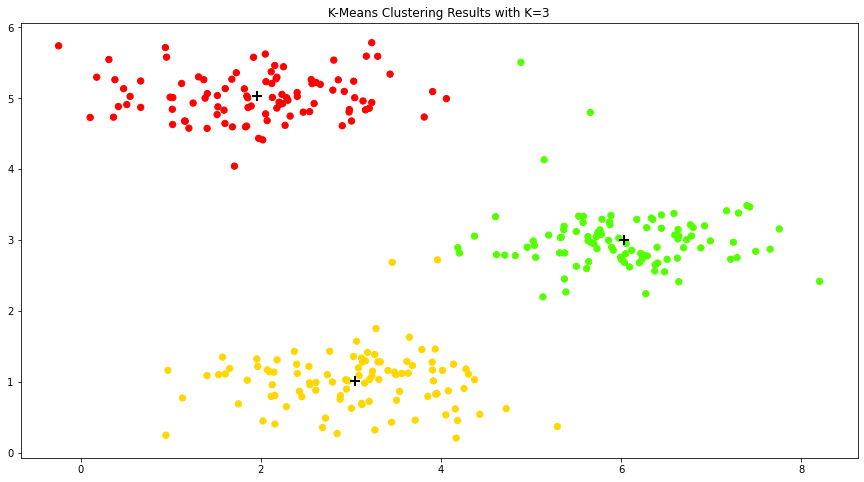

In [13]:
# plot
plt.figure(figsize=(15, 8))
plt.scatter(data[:, 0], data[:, 1], s=40, c=idx, cmap=plt.cm.prism)
plt.title('K-Means Clustering Results with K=3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='+', c='k', s=100, linewidth=2)

## Initialization method

- Forgy method:
        Randomly chooses k observations from the dataset and uses these as the initial means.

- Random Partition:
        First randomly assigns a cluster to each observation and then proceeds to the update step, thus computing the initial mean to be the centroid of the cluster's randomly assigned points. 

In practice, a good strategy for initializing the centroids is to select random examples from the dataset.

In [14]:
def init_centroids(X, K):
    """
    This function initializes K centroids that are to be used in K-means on the dataset X.
    
    @Parameters
        X: (n, m) -> n examples each of m dimensions.
        K: int    -> The number of clusters.
    
    @Returns
        centroids: (K, m) -> Centroids of the clusters
    """
    # Initializr value, number of rows and cloumns
    n, m = X.shape
    centroids = np.zeros((K, m))
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    # Take the first K examples as centroids
    centroids = X[randidx[:K], :]
    
    return centroids

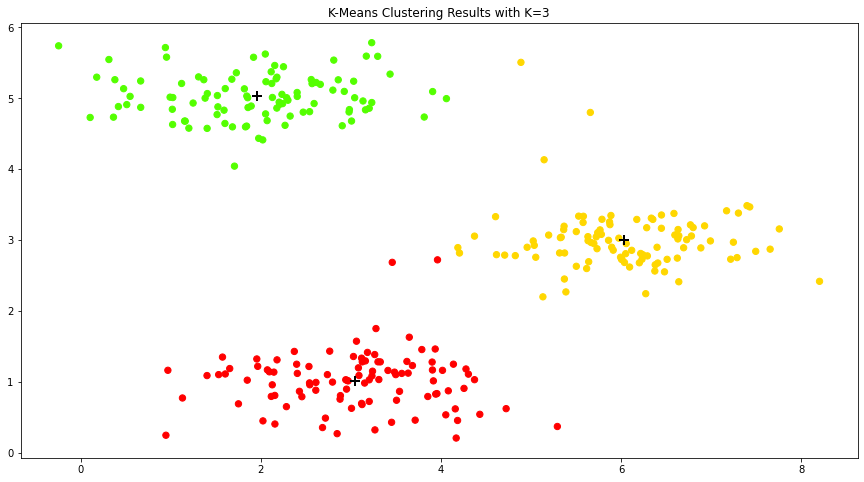

In [15]:
K = 3
max_iters = 10
initial_centroids = init_centroids(data, K)
centroids, idx = train_k_means(data, initial_centroids, max_iters = 10)

# plot
plt.figure(figsize=(15, 8))
plt.scatter(data[:, 0], data[:, 1], s=40, c=idx, cmap=plt.cm.prism)
plt.title('K-Means Clustering Results with K=3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='+', c='k', s=100, linewidth=2)